#HARP 210 - Final Project
----------------------------------------------
###I. Introduction:


> The following dataset contains data regarding Ted Talks from 2006-2020 that I retrieved from Kaggle (https://www.kaggle.com/datasets/miguelcorraljr/ted-ultimate-dataset). The dataset includes information such as: Ted Talk title, speaker, description, topic, views, transcript, etc., making it worthwhile for NLP. I found this dataset particularly interesting for NLP because Ted Talks are built on the premis of "ideas worth spreading". Based on the premis that Ted Talks are supposed to center around "ideas worth spreading", we can use this dataset to visualize what viewers of Ted Talks think is worth hearing, how Ted Talk speakers discuss relevant topics, etc. While there are almost endless research opportunities for this dataset, the three research questions being asked in this project are:

1. Are there certain Ted Talk topics that tend to be more popular? (i.e., Which topics get the most views?)

2. Has there been a shift in the words used in Ted Talks about Climate Change over time?
  - In other words, has there been a change in the climate change issue discussed in Ted Talks as time has passed?

3. A lot of topics talk about climate change. Can we use topic modeling to find subtopics within climate change?

---------------------------------------
##### Loading in External Modules:


In [ ]:
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from sklearn.feature_extraction.text import *
from sklearn import metrics
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *

-----------------------------------------------------------------
### II. Analysis

In [ ]:
tedtalk = pd.read_csv("ted_talks_en.csv.zip")

In [ ]:
tedtalk.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
del tedtalk["url"]
del tedtalk["available_lang"]
del tedtalk["about_speakers"]
del tedtalk["related_talks"]

In [ ]:
tedtalk["year"] = tedtalk["published_date"].str[0:4]

------------------------------
###2.1) Question 1
>Are there certain Ted Talk topics that tend to be more popular? (i.e., Which topics get the most views?)

In [ ]:
regex = r"\'([^\']+)\'"

In [ ]:
words = tedtalk["topics"].str.extractall(regex)
words = words.reset_index()
del words["match"]
words.index = words["level_0"]

In [ ]:
new_tedtalk = tedtalk.join(words)

In [ ]:
new_tedtalk["topic"] = words[0].str.lower()

In [ ]:
new_tedtalk.head()

,talk_id,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,comments,duration,topics,description,transcript,year,level_0,0,topic
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,272.0,977,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,0,alternative energy,alternative energy
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,272.0,977,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,0,cars,cars
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,272.0,977,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,0,climate change,climate change
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,272.0,977,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,0,culture,culture
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,272.0,977,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,0,environment,environment


In [ ]:
poptopics = new_tedtalk.groupby("topic").mean()["views"]

In [ ]:
poptopics = poptopics.sort_values( ascending = False)
poptopics = poptopics.reset_index()
poptopics["views"] = poptopics["views"]/1000000
poptopics.head(15)

,topic,views
0,body language,10.196415
1,introvert,8.575487
2,success,6.669638
3,mindfulness,6.221134
4,string theory,5.599329
5,productivity,5.290027
6,meditation,5.178463
7,suicide,4.971946
8,comedy,4.899442
9,time,4.766539


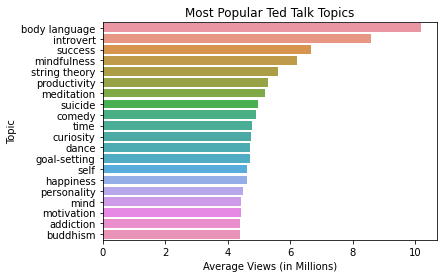

In [ ]:
sns.barplot(data = poptopics[0:20], x= "views", y= "topic")
plt.xlabel("Average Views (in Millions)")
plt.ylabel("Topic")
plt.title("Most Popular Ted Talk Topics")
plt.show()

####**Results from Question 1:**
> As seen in the graph, the Ted Talk topics that have the highest views on average tend to be the ones about self betterment. We can see this specifically with topics, such as "success", "goal-setting", "happiness", "productivity", etc., ranking among the highest average views. I think this visual really reflects Ted Talk's values and the premis of "ideas worth spreading". If a large amount of the highest viewed (on average) topics are about self improvement, then we can see that this is something the viewers think is really important.
#### Further Discussion:
This question was analyzed using word counting. The data was first reorganized using regular expressions by giving each of the topics given to each Ted Talk in the "topics" column a new row as seen in the "topic" column. After this a new variable (poptopics) was created to find the average number of views grouped by topic. The views were changed to be valued in millions and then the data was visualized in a barplot that shows the most popular topics and their respective average views.

-----------------------------------------------
####2.2) Question 2:
> Has there been a shift in the words used in Ted Talks about Climate Change over time?

In [ ]:
regex = r"(n't|'ve|'d|\w+|\S)"
def fast_process(og_df, textcol=None):

    # Split the dataset using a regular expression
    # (a much more complex equivalent of the .split() method)
    splits = og_df[textcol].str.extractall(regex)

    # Manipulate the index on the split words so that
    # each word's index matches the index in the original dataframe
    # so they can be joined together later
    splits = splits.reset_index()
    splits.index = splits["level_0"]
    splits = splits[[0]]
    splits.index.name=""
    splits = splits.rename(columns={0:"token"})

    # Populate the other columns (except POS and lemma, which requires spacy)
    splits["lower_"]   = splits["token"].str.lower()
    splits["is_stop"]  = splits["lower_"].isin(nlp.Defaults.stop_words)
    splits["is_punct"] = splits["lower_"].isin([*string.punctuation])
    splits["is_digit"] = splits["lower_"].str.fullmatch(r"[\-\+]?\d+.?\d*")
    splits["is_space"] = splits["lower_"].str.fullmatch(r"\s")

    # Make a new dataframe, joining the splits to the original one
    new_df = og_df.copy().join(splits)

    new_df["is_stop"]  = new_df["is_stop"].astype("bool")
    new_df["is_punct"] = new_df["is_punct"].astype("bool")
    new_df["is_digit"] = new_df["is_digit"].astype("bool")
    new_df["is_space"] = new_df["is_space"].astype("bool")

    return new_df

In [ ]:
envi_tedtalks = new_tedtalk.loc[new_tedtalk["topic"] == "climate change"].copy()
envi_tedtalks["transcript"] = envi_tedtalks["transcript"].str.replace("—", "")
envi_tedtalks["transcript"] = envi_tedtalks["transcript"].str.replace("'", "")
envi_tedtalks["transcript"] = envi_tedtalks["transcript"].str.replace("’", "")
envi_tedtalks["transcript"] = envi_tedtalks["transcript"].str.replace("♫", "")
envi_tedtalks["transcript"] = envi_tedtalks["transcript"].str.replace("CF", "")

In [ ]:
df = fast_process(envi_tedtalks, textcol = "transcript")

In [ ]:
def calculate_tfidf(dataframe, groupcol):
  counts = df.groupby(groupcol)["lower_"].value_counts(normalize=True)
  counts = counts[counts > 0.0005]
  counts.name = "tf"
  counts = counts.reset_index()

  num_documents = len(set(counts[groupcol]))
  doc_f = counts["lower_"].value_counts()/num_documents
  doc_f.name="df"
  doc_f = doc_f.reset_index()

  tf = counts
  tf.index = tf["lower_"]
  doc_f.index = doc_f["index"]
  data = tf.join(doc_f).reset_index()[[groupcol, "index", "tf", "df"]]

  data["tfidf"] = data["tf"]*np.log(1/data["df"])
  data = data.sort_values("tfidf", ascending=False)

  return data

In [ ]:
envi = calculate_tfidf(df, "year")

In [ ]:
most_common = envi.loc[envi.groupby("year")["tfidf"].idxmax()]
most_common["word_year"] = (most_common["index"] + " (" + most_common["year"] + ")")

In [ ]:
most_common[0:15]

,year,index,tf,df,tfidf,word_year
2276,2006,pole,0.002416,0.142857,0.004702,pole (2006)
879,2007,dollars,0.001177,0.142857,0.002290,dollars (2007)
781,2008,creativity,0.002628,0.071429,0.006935,creativity (2008)
553,2009,biosphere,0.001268,0.071429,0.003346,biosphere (2009)
2028,2010,nuclear,0.005674,0.214286,0.008741,nuclear (2010)
2474,2012,sharks,0.001433,0.071429,0.003781,sharks (2012)
494,2013,bees,0.003149,0.142857,0.006127,bees (2013)
1854,2014,model,0.002217,0.142857,0.004313,model (2014)
810,2015,deforestation,0.001377,0.071429,0.003633,deforestation (2015)
1797,2016,mars,0.001534,0.071429,0.004049,mars (2016)


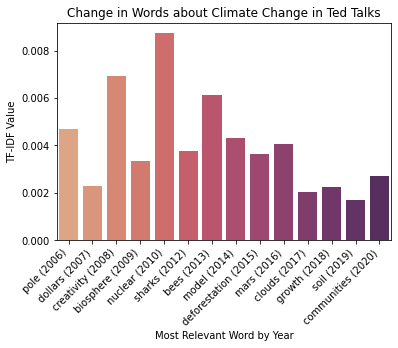

In [ ]:
sns.color_palette("flare")
sns.barplot(data=most_common, x= "word_year", y= "tfidf", palette = "flare")
plt.title("Change in Words about Climate Change in Ted Talks")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.xlabel("Most Relevant Word by Year")
plt.ylabel("TF-IDF Value")
plt.show()

####**Results from Question 2:**
> By looking at the results of the graph for Question 2, we are able to see the shift in the words found in Ted Talks about climate change. For example, we can see that "bees" had the highest TF-IDF value for 2013, meaning that we can infer that a lot of talk about climate change Ted Talks in 2013 had something to do with bees. As we look at other words and their respective years and TF-IDFs, we can see words such as "nuclear", perhaps having to do with nuclear energy, "deforestation", perhaps in regards to decrease in carbon capture, etc. Overall, the results do a pretty good job in showing the unique words per year in climate change Ted Talks.
>> An additional thing to point out is the difference in TF-IDF values. While each of these words are the most relevant word for their corresponding year, some words have higher TF-IDF values than others. For example, the word "nuclear" has a much higher TF-IDF than "soil", as seen in the graph. These words were the most relevant, unique word for their year, but their relative strengths are different. "Nuclear" is a much more relevant word for the Ted Talks in 2010 than the word "soil" was for Ted Talks in 2019.

#### Further Discussion:
The analysis to Question 2 was performed using word counting and, more specifially, TF-IDF analysis. Before processing the data, the data was condensed to only include Ted Talks where the topic was "climate change" and stored into a variable (envi_tedtalks). The data was then also slightly cleaned to remove any words that were extrenuous and unrecognizable by the process function. This data was then passed through a function to calculate its TF-IDF. This data was then sorted to show the words with the highest TF-IDF values grouped by year and an extra column was created placing both word and year together (for better vizualization). These 15 words were then visualized on a bar plot including their respective TF-IDF values.

---------------------------
###2.3) Question 3
A lot of topics talk about climate change. Can we use topic modeling to find subtopics within climate change?

In [ ]:
def plot_top_words(pipeline, n_top_words):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
text_pipeline = Pipeline([
     ('tokenize', CountVectorizer(max_features=5000, stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=10))
    ])

In [ ]:
new_tedtalk["transcript"] = new_tedtalk["transcript"].str.replace(r"\w+\:", "")

<ipython-input-207-92103141dd95>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_tedtalk["transcript"] = new_tedtalk["transcript"].str.replace(r"\w+\:", "")


In [ ]:
climate = new_tedtalk[new_tedtalk["topic"] == "climate change"].copy()

In [ ]:
text_pipeline.fit_transform(climate["transcript"])

array([[0.00542189, 0.00542182, 0.00542203, ..., 0.00542182, 0.03760784,
        0.00542182],
       [0.00621332, 0.0062133 , 0.00621334, ..., 0.0062159 , 0.07197438,
        0.00621336],
       [0.00567427, 0.00567427, 0.00567427, ..., 0.00567427, 0.00567442,
        0.00567427],
       ...,
       [0.01015534, 0.01015391, 0.1347238 , ..., 0.01015397, 0.01015412,
        0.0101539 ],
       [0.04429078, 0.00863114, 0.00863101, ..., 0.0086313 , 0.00863101,
        0.00863101],
       [0.01072899, 0.01072903, 0.01072906, ..., 0.01073001, 0.01072899,
        0.13779797]])

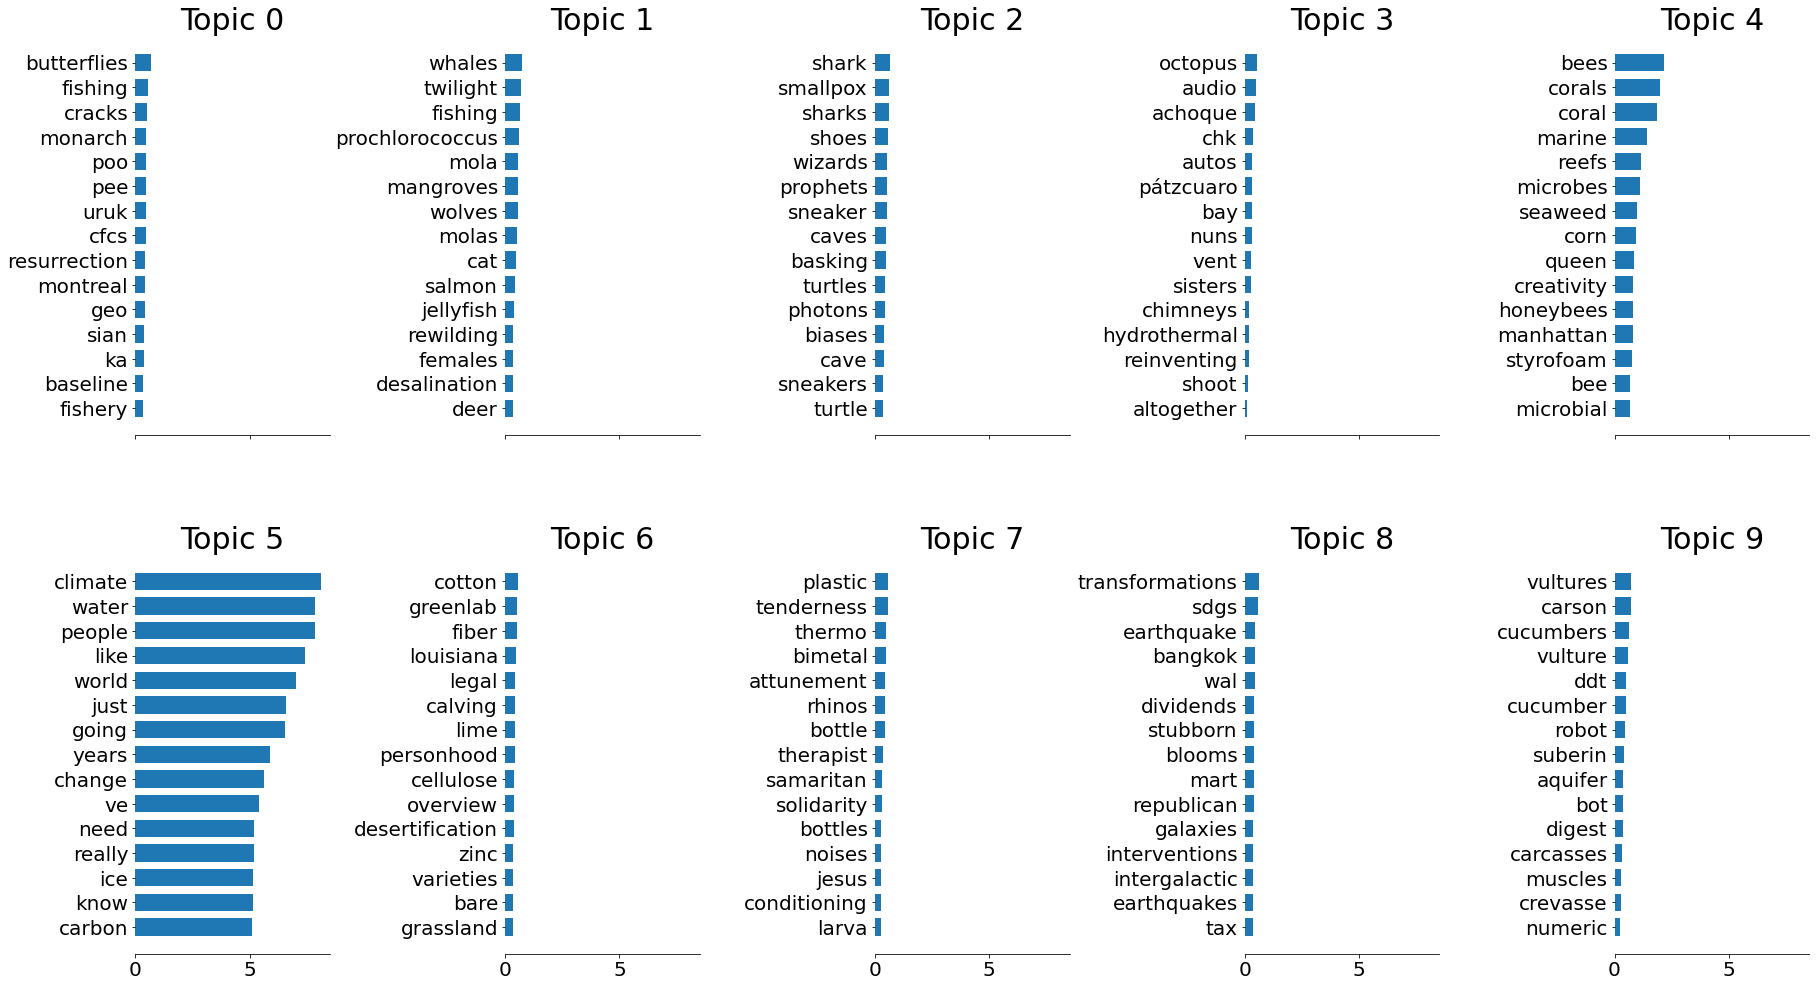

In [ ]:
plot_top_words(text_pipeline, 15)

####**Results from Question 3:**
> Using topic modelling, I was able to somewhat visuaize what subtopics might be found within Ted Talks about climate change. As we can see from the visual produced, there are a few topics that can be inferred based on the most common words.
>> In Topic 5, we can see that some of the most common words include:
climate, water, ice, carbon, change, etc.
* From this, we can see that this topic is created from the most generic type of words used in discussing climate change (i.e., water levels, ice melting, carbon dioxide pollution, etc.)

>> We can make some possible inferences about topics like Topic 4 and Topic 8
* Topic 4 seems to use a lot of words regarding bees (bees, queen, honeybees) which could possibly show that a this Topic is about the relation of bees in regards to climate change.
* Topic 8 seems to mention natural disasters, such as earthquakes, and words like "intervention", "transformation", and "sdgs" (acronym for Sustainable Development Goals). Although it's difficult to infer what the topic is based on these words, we can take a guess and say that this could possibly

> Overall, the topic modelling didn't product the best results in which we could sucessfully predict what each or most of the topics were. The only words that seem to have a high tf-idf are the one found within Topic 5, which are the mot generic words when discussing climate change. Other than this, the words seem to be "scattered" within the topics, which makes it difficult to see what the topic is about since they lack a clear direction.

#### Further Discussion:
The analysis for research Question 3 was done using topic modelling. To do so, the words of climate change Ted Talk transcripts were first stored into a variable (climate). This variable was then passed through a text pipeline and plotted into a topic modelling visual, as shown above.

-----------------------------------
### III. Conclusions
**Question 1 Conclusions:**
>Based on the analysis of Research Question 1, I concluded that the most popular Ted Talks were generally about self betterment by using word counting to visualize the topics with the highest views on average.
>> *Successes and Failures:*


*   Successes: The analysis of research question 1 was generally very successful with little short comings considering the analysis could be done in a relatively simple manner.
*   Failures: A possible argument someone could make against this analysis is that more views on average does not equate to popularity. For example, they may argue that popularity is determined on the basis that a Ted Talk topic has higher views on average and also is accompanied by a good rating (ex. more thumbs up than thumbs down). Because this dating did not include any information about ratings, the analysis was limited to using the views per topic.

**Question 2 Conclusions:**
> Based on a TF-IDF analysis for Research Question 2, I was able to visualize the most relevant, unique word for climate change Ted Talks over the time period of 2006 - 2020. For example, we can see that the word "nuclear" had the highest TF-IDF value for 2010, "bees" for 2013, and so on.
>> *Successes and Failures:*


*   Successes: Using TF-IDF to visualize the most relevant words for climate change over time was relatively successful (especially after cleaning the data to not include characters that were unrecognizable to the process function).
*   Failures: While visualing the TF-IDF values by year was successful, there are a few shortcomings that might be in favor of using a different approach to perform an analysis of Question 2. The shortcoming is based of the notion that if a Ted Talk that mentions a specific word a lot of times will inherently raise that word's TF-IDF value, even if that word doesn't necessarily show up in more Ted Talks. For example, if the word "bees" is mentioned an extremely high amount in one climate change Ted Talk, it's text frequency will therefore be high, thus impacting its TF-IDF value. This might be the case for some TF-IDF values since Ted Talks tend to be about very specific topics. Besides this possibility, however, the TF-IDF analysis seems to have presented words that have been discussed in terms of climate change.

**Question 3 Conclusions:**
> For Question 3, I was able to conclude that one topic (Topic 5) had words that were strongly correlated to it, but these ended up being the most general kind of terms in regards to discussing climate change. Other than this, we can only slightly infer what the other topics might be about, but not to a decent extent.
>> *Successes and Failures:*


*   Successes: While the topic modelling worked to a certain extent, the problems that came along with the analysis seem to have outweighed the successes it may have had.
*   Failures: After looking at the results from the topic modelling analysis and also adjusting certain parameters to try to get a better analysis, the results from the analysis still seem to suggest that a more sophisticated approach would be more successful. The main reason I think this method of topic modelling may have struggled with generating "subtopics" was mst likely due to the fact that Ted Talks tend to be highly specific and very scattered. Because of this, there must've been trouble with grouping words since they are quite a large variety of words that a specific to unique Ted Talks. A more sophisticated type of machine learning may have been able to look past the words that don't contribute much to possible groupings of climate change Ted Talks.

